<a href="https://colab.research.google.com/github/DheniMoura/Analise-Exploratoria-de-Dados---Unitner/blob/main/Uninter_EDA_Aula_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e Importação dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/dayanebravo/AED/main/pes_2012.csv')
df1.head()

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232


In [4]:
# Converte para numérico, transforma em float e substitui os erros por NaN
df1['V4718'] = pd.to_numeric(df1['V4718'], errors='coerce')
df1['V4720'] = pd.to_numeric(df1['V4720'], errors='coerce')  

In [5]:
df = df1.dropna()
df.head()

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000.0,3000.0,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000.0,3000.0,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100.0,1100.0,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100.0,1100.0,232
5,2012,Rondônia,Masculino,56,Preta,15 anos ou mais,10000.0,10000.0,232


In [7]:
series = pd.read_csv('/content/daily-total-female-births.csv', 
                     header=0, index_col=0, parse_dates=True, squeeze=True)
series.head()

<ipython-input-7-91f389abd410>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('/content/daily-total-female-births.csv',


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='ticks', palette='crest') #estilo e cor dos gráficos

# Séries: Temporais e Geográficas


## Séries Temporais
Ver no Kaggle 

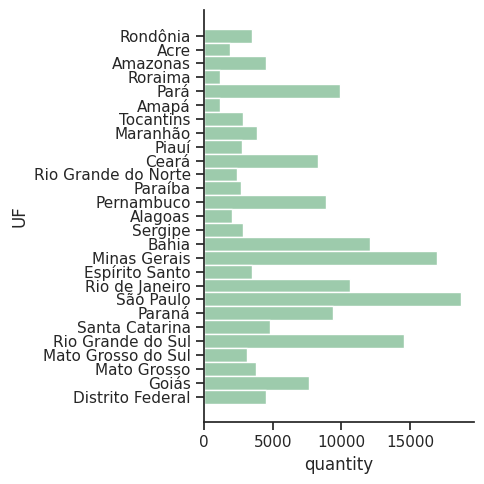

In [9]:
sizes = df.UF # analyzed column

sn.displot(y=sizes) # data vertically to avoid spacing issues

plt.ylabel('UF')
plt.xlabel('quantity')
plt.show()

## Séries Geográficas

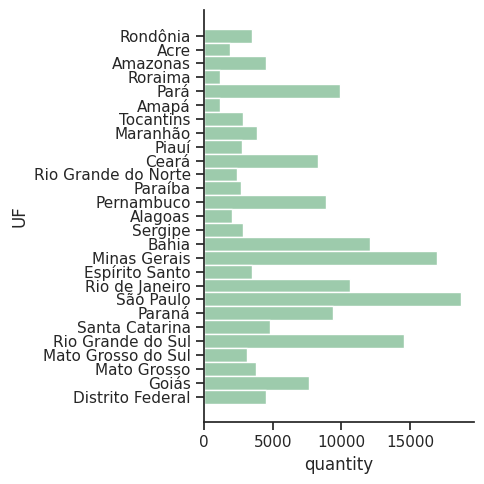

In [10]:
sizes = df.UF # coluna analisada

sn.displot(y=sizes) # dados na vertical para evitar problemas de espaçamento

plt.ylabel('UF')
plt.xlabel('quantity')
plt.show()

# Somatórios

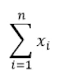

In [11]:
def somatorio(x): # criar uma função que precisa de uma entrada x
  if x == 1:
    return 1
  else:
    return x + somatorio(x-1) # retorna a soma do termo e seu antecessor - recursiva
  
x = int(input("Calcular somatório de 1 até: "))
print('Resultado do somatório: ', somatorio(x))

Calcular somatório de 1 até: 5
Resultado do somatório:  15


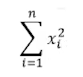

In [14]:
def somatorio_dos_quadrados(x):

  if x==1:
    return 1
  else:
    return x**2 + somatorio_dos_quadrados(x-1) # retorna a soma do termo elevado ao quadrado e seu antecessor - recursiva

x = int(input("Calcular somatório de 1 até: "))
print('Resultado da soma dos quadrados: ', somatorio_dos_quadrados(x))

Calcular somatório de 1 até: 5
Resultado da soma dos quadrados:  55


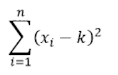

In [18]:
def somatorio_quad_menos_k(x, k):
  if x==1:
    return 1
  else:
    return (x-k)**2 + somatorio_quad_menos_k(x-1, k) # retorna a soma do termo elevado ao quadrado e seu antecessor - recursiva

x = int(input("Calcular somatório de 1 até: "))
k = int(input("O valor médio dos dados é: "))
print('Resultado da soma dos quadrados: ', somatorio_quad_menos_k(x, k))

Calcular somatório de 1 até: 5
O valor médio dos dados é: 2
Resultado da soma dos quadrados:  15


Construindo os somatórios com entradas do banco de dados

In [20]:
x = df.V8005 
k = df.V8005.mean()

def dm(x, k): # dm => desvio da média
  aux = np.array((x-k)**2) # auxiliar que monta um vetor com a entrada subtraída da média e esse resultado elevado ao quadrado
  return aux.sum() # saída da função: soma dos termos do vetor aux

print('Resultado da função: ', dm(x, k)) # print que chama a função definida calculada em x

Resultado da função:  31445653.362529


# Medidas de Tendência Central: Mediana, Moda e Média

## Mediana

In [21]:
np.median(df.V8005) # usando numpy

37.0

In [22]:
df.V8005.median() # usando pandas

37.0

## Moda

In [23]:
df.V8005.mode() # moda em dados quantitativos

0    30
Name: V8005, dtype: int64

In [25]:
df.UF.mode() # moda em dados qualitativos

0    São Paulo
Name: UF, dtype: object

## Média Aritmética
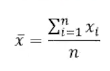

In [26]:
np.mean(df.V8005) # usando numpy

37.89061415323275

In [27]:
df.V8005.mean() # usando pandas

37.89061415323275

## Média Ponderada
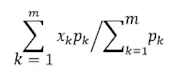

In [29]:
pa = [15,15,30,30,10] # Lista com os pesos de cada avaliação
spa = 100 # soma dos pesos das avaliações

print("Índices das avaliações: ",
      "\n 1 - APOL 1,",
      "\n 2 - APOL 2,",
      "\n 3 - Prova Objetiva,",
      "\n 4 - Atividade Prática,",
      "\n 5 - Prova Discursiva \n",)
# orientação para o usuário

xi = [] #Lista com as notas de cada avaliação
md = [] # Lista com os produtos do peso e da avaliação associada ao índice i
n = 5 # Número de avaliações
i = 0 # Índice i que vai percorrer todas as notas

for i in range(n): # cada nota i dentro do número de avaliações
  print("\nAvaliação índice: ", i+1) # mensagem para o usuário
  xi.append(int(input("Insira a nota da avaliação de acordo com o índice acima: "))) # entrada de xi
  md.append(pa[i]*xi[i]) # inserir em md o resultado da multiplicação do peso pela nota

# Calcural a soma dos produtos em md
xp = 0
for k in md: # cada entrada k em md
  xp = xp+k # soma das entradas de md

print("Esta é a média ponderada das suas notas: ", xp/spa)


Índices das avaliações:  
 1 - APOL 1, 
 2 - APOL 2, 
 3 - Prova Objetiva, 
 4 - Atividade Prática, 
 5 - Prova Discursiva 


Avaliação índice:  1
Insira a nota da avaliação de acordo com o índice acima: 90

Avaliação índice:  2
Insira a nota da avaliação de acordo com o índice acima: 10

Avaliação índice:  3
Insira a nota da avaliação de acordo com o índice acima: 100

Avaliação índice:  4
Insira a nota da avaliação de acordo com o índice acima: 95

Avaliação índice:  5
Insira a nota da avaliação de acordo com o índice acima: 80
Esta é a média ponderada das suas notas:  81.5


## Média Geométrica
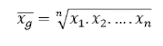

In [30]:
def geo_mean(k): 
  aux = np.array(k) # auxiliar que monta um vetor com a entrada
  return aux.prod()**(1.0/len(aux)) # saída: produto dos termos do vetor aux elevado à (1/n)

x = [2,4,8,16,32] # entrada como vetor
print(geo_mean(x)) # print que chama a função definida calculada em x

8.000000000000002


## Média Harmônica
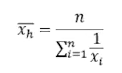

In [31]:
x = [1,1/2,1/3,1/4,1/5] # entrada como vetor
n = len(x)

def soma_inv(k): 
  aux = 1/np.array(k) # auxiliar que monta um vetor com o valor inverso da entrada
  return aux.sum() # saída: soma dos termos do vetor aux

print(n/soma_inv(x))

0.3333333333333333


In [32]:
import statistics 
x = [1,1/2,1/3,1/4,1/5]
print(statistics.harmonic_mean(x))

0.3333333333333333
